## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

### ImportError: 
### `load_boston` has been removed from scikit-learn since version 1.2.
#### [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset?resource=download)  para baixar csv.


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [31]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# ImportError: 
# `load_boston` has been removed from scikit-learn since version 1.2.
#boston = datasets.load_boston()

boston = pd.read_csv('../../../../Datasets/HousingData.csv', sep = ',')

# separando dataframe

In [32]:
boston.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [33]:
# dropping na
boston.dropna(inplace=True)

In [34]:

X = boston.drop(columns='MEDV')
y = boston['MEDV']

In [35]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [38]:
y.head()  

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [39]:
# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
from sklearn.tree import DecisionTreeRegressor

# instanciando a árvore
tree_8 = DecisionTreeRegressor(max_depth=8)

# treinando a árvore
tree_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [41]:
# prevendo os valores
y_pred_train_8 = tree_8.predict(X_train)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [42]:
path = tree_8.cost_complexity_pruning_path(X_train, y_train)


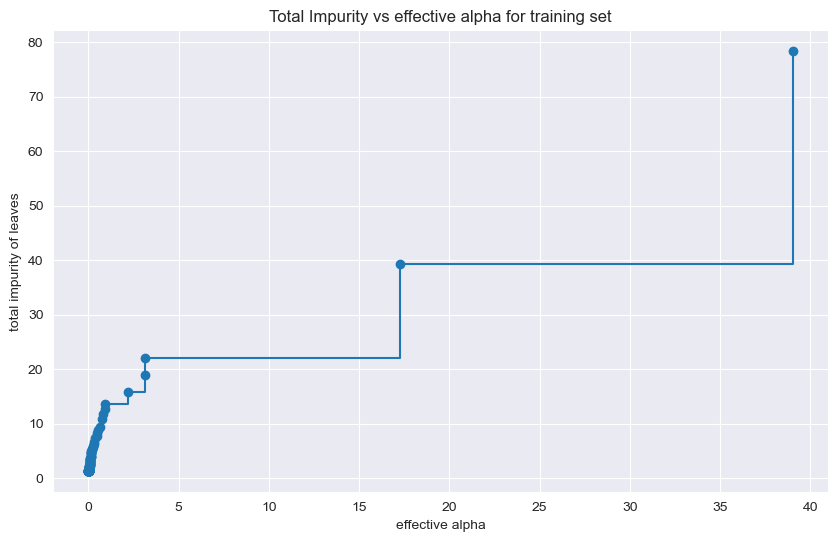

In [43]:
import matplotlib.pyplot as plt
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [44]:
clfs = []
for ccp in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp)
    tree.fit(X_train, y_train)
    clfs.append(tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [45]:
from sklearn.metrics import mean_squared_error

train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

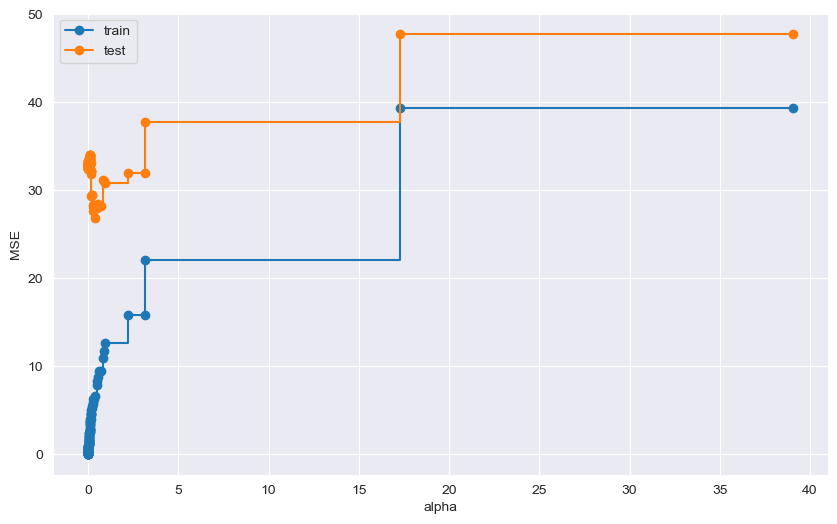

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [47]:
# encontrando o melhor alpha pois está meio confuso no gráfico.
for i in range(len(ccp_alphas)):
    if test_scores[i] == min(test_scores):
        best_alpha = ccp_alphas[i]
        best_tree = clfs[i]
        break

In [48]:
from sklearn.metrics import r2_score

# calculando o r2
r2_score(y_test, best_tree.predict(X_test))

0.7122191462523227

### 7. Visualize esta árvore.

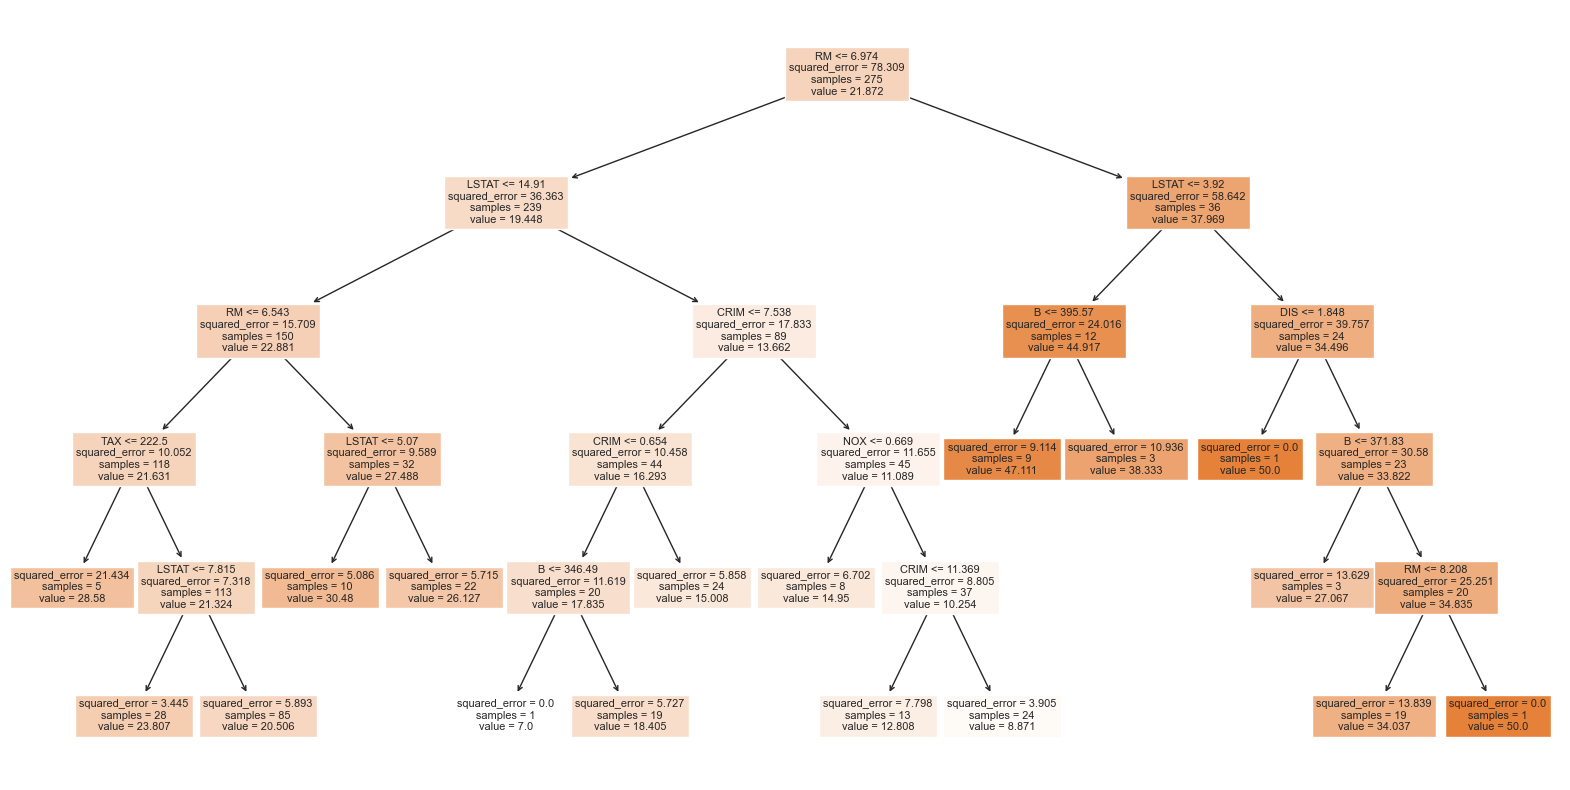

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns.tolist())
plt.show()

Podemos observar claramente que o alpha melhorou modelo podando 2 niveis da árvore e reduzindo a quantidade de folhas para 8, o que melhorou o r2 do modelo.